In [1]:
import pandas as pd

In [22]:
import matplotlib.pyplot as plt


In [2]:
data = 'dataset\carEvaluation.csv'

df = pd.read_csv(data, header=None)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\User\AppData\Local\Temp\ipykernel_12644\2931129709.py:1: SyntaxWarning: invalid escape sequence '\c'
  data = 'dataset\carEvaluation.csv'


In [3]:
df.shape

# عرض عدد الصفوف والأعمدة في البيانات.
# المخرجات: زوج (عدد الصفوف, عدد الأعمدة).

(1728, 7)

In [4]:
# preview the dataset

df.head()

0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc

In [5]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

# تعريف أسماء الأعمدة.
# استبدال الأسماء الافتراضية بالأسماء المعرفة.
# عرض أسماء الأعمدة.

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
# let's again preview the dataset

df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc

In [7]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [8]:
# إعلان متجه الميزة والمتغير المستهدف

X = df.drop(['class'], axis=1)

y = df['class']

# تقسيم البيانات إلى:
# X: الميزات (المدخلات).
# y: المتغير الهدف (التصنيفات).

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# تقسيم البيانات إلى بيانات تدريب (67%) وبيانات اختبار (33%).

In [10]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [11]:
# import category encoders

import category_encoders as ce

# استيراد مكتبة category_encoders لتشفير البيانات الفئوية.

In [12]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# تشفير البيانات الفئوية في ميزات X_train وX_test إلى أرقام.

In [13]:
X_train.head()

buying  maint  doors  persons  lug_boot  safety
48         1      1      1        1         1       1
468        2      1      1        2         2       1
155        1      2      1        1         2       2
1721       3      3      2        1         2       2
1208       4      3      3        1         2       2

In [14]:
X_test.head()

buying  maint  doors  persons  lug_boot  safety
599        2      2      4        3         1       2
1201       4      3      3        2         1       3
628        2      2      2        3         3       3
1498       3      2      2        2         1       3
1263       4      3      4        1         1       1

In [15]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [33]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# إنشاء نموذج شجرة قرار يستخدم مؤشر Gini كمعيار لتقسيم العقد.
# تدريب النموذج باستخدام بيانات التدريب.
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
y_pred_gini = clf_gini.predict(X_test)

# التنبؤ بقيم التصنيف باستخدام بيانات الاختبار.

In [35]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

# حساب دقة النموذج باستخدام معيار "Entropy".

Model accuracy score with criterion gini index: 0.8021


In [36]:
# compare the train-set and test-set accuracy to check for overfitting.
# التنبؤ بقيم التصنيف باستخدام بيانات التدريب.

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      shape=(1157,), dtype=object)

In [37]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7865


In [39]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


[Text(0.4, 0.875, 'x[5] <= 1.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\ngini = 0.577\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\ngini = 0.631\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'gini = 0.496\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'gini = 0.654\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

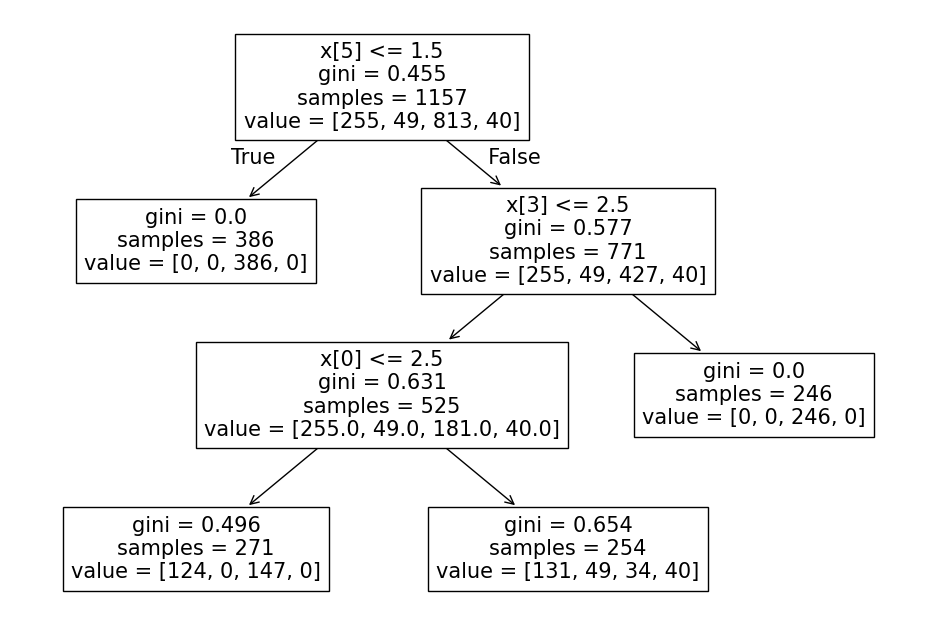

In [40]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 



In [42]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# عند استخدام criterion='entropy' في شجرة القرار، يتم تقييم جودة تقسيم العقد باستخدام مفهوم Entropy، 
# وهو مقياس رياضي يعبر عن مقدار "عدم اليقين" أو "الاضطراب" في مجموعة البيانات.

# fit the model
clf_en.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [43]:
y_pred_en = clf_en.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8021


In [45]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['unacc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'acc'],
      shape=(1157,), dtype=object)

In [46]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7865


In [47]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7865
Test set score: 0.8021


[Text(0.4, 0.875, 'x[5] <= 1.5\nentropy = 1.2\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 386\nvalue = [0, 0, 386, 0]'),
 Text(0.30000000000000004, 0.75, 'True  '),
 Text(0.6, 0.625, 'x[3] <= 2.5\nentropy = 1.474\nsamples = 771\nvalue = [255, 49, 427, 40]'),
 Text(0.5, 0.75, '  False'),
 Text(0.4, 0.375, 'x[0] <= 2.5\nentropy = 1.638\nsamples = 525\nvalue = [255.0, 49.0, 181.0, 40.0]'),
 Text(0.2, 0.125, 'entropy = 0.995\nsamples = 271\nvalue = [124, 0, 147, 0]'),
 Text(0.6, 0.125, 'entropy = 1.759\nsamples = 254\nvalue = [131, 49, 34, 40]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 246\nvalue = [0, 0, 246, 0]')]

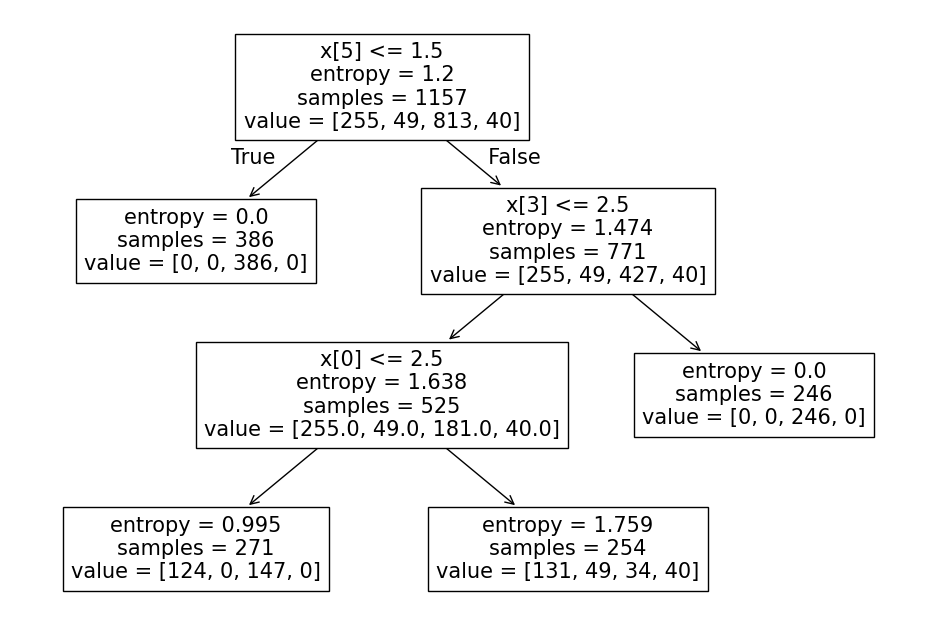

In [48]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

# رسم شجرة القرار باستخدام معيار "Entropy".

In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

# حساب وعرض مصفوفة الالتباس.

Confusion matrix

 [[ 73   0  56   0]
 [ 20   0   0   0]
 [ 12   0 385   0]
 [ 25   0   0   0]]


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

# عرض تقرير التصنيف الذي يحتوي على المقاييس: الدقة (Precision)، الاستدعاء (Recall)، وF1-score لكل فئة

              precision    recall  f1-score   support

         acc       0.56      0.57      0.56       129
        good       0.00      0.00      0.00        20
       unacc       0.87      0.97      0.92       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



d:\ترم ثاني\تنقيب بيانات عملي د.عبد الله القشوي\final\3- DecisionTree\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ترم ثاني\تنقيب بيانات عملي د.عبد الله القشوي\final\3- DecisionTree\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\ترم ثاني\تنقيب بيانات عملي د.عبد الله القشوي\final\3- DecisionTree\env\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa